## Load

In [1]:
task_name = 'task3_jenga_openface'

In [2]:
model_path = './models/{0}/'.format(task_name)

In [3]:
import os
import numpy as np
import pandas as pd
import warnings
import pickle

from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
save_path = './data/tmp_analysis/{0}'.format(task_name)
save_train_path = save_path + '_train.csv'
save_test_path = save_path + '_test.csv'
save_valid_path = save_path + '_valid.csv'


Train = pd.read_csv(save_train_path)
Test = pd.read_csv(save_test_path)
Valid = pd.read_csv(save_valid_path)

In [5]:
X = np.asarray(Train.to_numpy()[:,3:]).astype('float32')

In [6]:
del Train

In [7]:
Xtest = np.asarray(Test.to_numpy()[:,3:]).astype('float32')

In [8]:
del Test

In [9]:
Xvalid = np.asarray(Valid.to_numpy()[:,3:]).astype('float32')

In [10]:
del Valid

## Direct UMAP

https://umap-learn.readthedocs.io/en/latest/api.html

In [11]:
from umap import UMAP

In [12]:
umap_3 = UMAP(n_components=3, verbose=True)
umap_3.fit(X)

UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=3, verbose=True)
Construct fuzzy simplicial set
Thu Apr 22 21:55:05 2021 Finding Nearest Neighbors
Thu Apr 22 21:55:05 2021 Building RP forest with 24 trees
Thu Apr 22 21:55:15 2021 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	Stopping threshold met -- exiting after 2 iterations
Thu Apr 22 21:55:58 2021 Finished Nearest Neighbor Search
Thu Apr 22 21:56:07 2021 Construct embedding


/home/curt/analysisEnv/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Apr 22 22:02:46 2021 Finished embedding


UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=3, verbose=True)

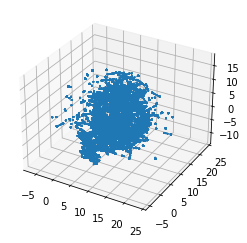

In [13]:
X_hat = umap_3.transform(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

Thu Apr 22 22:03:12 2021 Worst tree score: 0.95053883
Thu Apr 22 22:03:12 2021 Mean tree score: 0.95296324
Thu Apr 22 22:03:12 2021 Best tree score: 0.96365213
Thu Apr 22 22:03:20 2021 Forward diversification reduced edges from 2266020 to 564513
Thu Apr 22 22:03:27 2021 Reverse diversification reduced edges from 564513 to 564513


/home/curt/analysisEnv/lib/python3.6/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Thu Apr 22 22:03:33 2021 Degree pruning reduced edges from 476546 to 476544
Thu Apr 22 22:03:33 2021 Resorting data and graph based on tree order
Thu Apr 22 22:03:33 2021 Compressing index by removing unneeded attributes
Thu Apr 22 22:03:33 2021 Building and compiling search function
	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


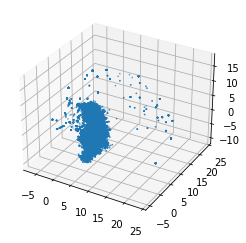

In [14]:
X_hat = umap_3.transform(Xtest)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


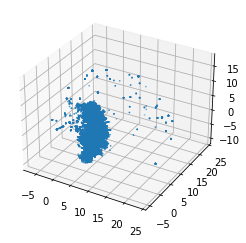

In [15]:
X_hat = umap_3.transform(Xvalid)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

In [16]:
pickle.dump(umap_3,open(model_path+'umap_3.p','wb'))

## PCA UMAP

In [17]:
from umap import UMAP

In [18]:
import pickle
# scikit-learn v0.24.1
PCA_n_32 = pickle.load(open(model_path + 'pca_n_32.p', 'rb'))

In [19]:
umap_3_pca = UMAP(n_components=3, verbose=True)
umap_3_pca.fit(PCA_n_32.transform(X))

UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=3, verbose=True)
Construct fuzzy simplicial set
Thu Apr 22 22:09:55 2021 Finding Nearest Neighbors
Thu Apr 22 22:09:55 2021 Building RP forest with 24 trees
Thu Apr 22 22:09:59 2021 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	Stopping threshold met -- exiting after 2 iterations
Thu Apr 22 22:10:09 2021 Finished Nearest Neighbor Search
Thu Apr 22 22:10:12 2021 Construct embedding


/home/curt/analysisEnv/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Apr 22 22:16:44 2021 Finished embedding


UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=3, verbose=True)

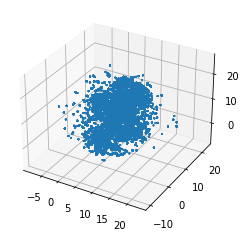

In [20]:
X_hat = umap_3_pca.transform(PCA_n_32.transform(X))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

Thu Apr 22 22:16:59 2021 Worst tree score: 0.95558954
Thu Apr 22 22:16:59 2021 Mean tree score: 0.95726869
Thu Apr 22 22:16:59 2021 Best tree score: 0.96318876
Thu Apr 22 22:17:00 2021 Forward diversification reduced edges from 2266020 to 563432
Thu Apr 22 22:17:01 2021 Reverse diversification reduced edges from 563432 to 563432
Thu Apr 22 22:17:01 2021 Degree pruning reduced edges from 475128 to 475127
Thu Apr 22 22:17:01 2021 Resorting data and graph based on tree order


/home/curt/analysisEnv/lib/python3.6/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Thu Apr 22 22:17:01 2021 Compressing index by removing unneeded attributes
Thu Apr 22 22:17:01 2021 Building and compiling search function
	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


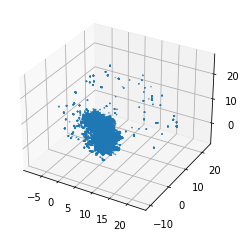

In [21]:
X_hat = umap_3_pca.transform(PCA_n_32.transform(Xtest))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


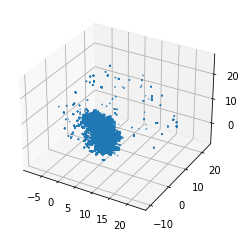

In [22]:
X_hat = umap_3_pca.transform(PCA_n_32.transform(Xvalid))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

In [23]:
pickle.dump(umap_3_pca,open(model_path+'umap_3_pca_32.p','wb'))

## Autoencoder - UMAP

In [24]:
import keras
Encoder_32 = keras.models.load_model('./models/all_data/alt_encoder_32.h5')

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.
/home/curt/analysisEnv/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [25]:
from umap import UMAP

In [26]:
umap_3_enc = UMAP(n_components=3, verbose=True)
umap_3_enc.fit(Encoder_32.predict(X))

UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=3, verbose=True)
Construct fuzzy simplicial set
Thu Apr 22 22:23:20 2021 Finding Nearest Neighbors
Thu Apr 22 22:23:20 2021 Building RP forest with 24 trees
Thu Apr 22 22:23:24 2021 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	Stopping threshold met -- exiting after 2 iterations
Thu Apr 22 22:23:33 2021 Finished Nearest Neighbor Search
Thu Apr 22 22:23:37 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Apr 22 22:29:20 2021 Finished embedding


UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=3, verbose=True)

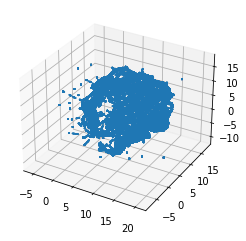

In [27]:
X_hat = umap_3_enc.transform(Encoder_32.predict(X))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

Thu Apr 22 22:29:36 2021 Worst tree score: 0.97169487
Thu Apr 22 22:29:36 2021 Mean tree score: 0.97401419
Thu Apr 22 22:29:36 2021 Best tree score: 0.98483464
Thu Apr 22 22:29:37 2021 Forward diversification reduced edges from 2266020 to 600550
Thu Apr 22 22:29:38 2021 Reverse diversification reduced edges from 600550 to 600550
Thu Apr 22 22:29:38 2021 Degree pruning reduced edges from 521146 to 521144
Thu Apr 22 22:29:38 2021 Resorting data and graph based on tree order


/home/curt/analysisEnv/lib/python3.6/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Thu Apr 22 22:29:38 2021 Compressing index by removing unneeded attributes
Thu Apr 22 22:29:38 2021 Building and compiling search function
	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


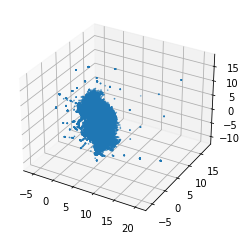

In [28]:
X_hat = umap_3_enc.transform(Encoder_32.predict(Xtest))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


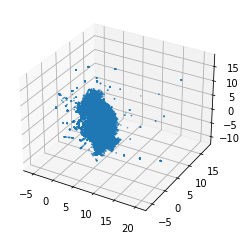

In [29]:
X_hat = umap_3_enc.transform(Encoder_32.predict(Xvalid))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], s = 0.5)

In [30]:
pickle.dump(umap_3_enc,open(model_path+'umap_3_enc_32.p','wb'))